In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [20]:
from sklearn.cluster import AgglomerativeClustering

In [21]:
data=pd.read_csv('Churn_Modelling.csv',nrows=500)

In [22]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [23]:
data.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
495,496,15804256,Hale,765,Germany,Male,36,8,92310.54,2,1,1,72924.56,0
496,497,15662403,Kryukova,622,France,Female,32,6,169089.38,2,1,0,101057.95,0
497,498,15733616,Sopuluchukwu,806,France,Male,40,5,80613.93,1,1,1,142838.64,0
498,499,15591995,Barry,757,Germany,Male,26,8,121581.56,2,1,1,127059.04,0
499,500,15677020,Selezneva,570,France,Female,58,8,0.00,1,0,1,116503.92,1


In [24]:
x = data[['Balance','EstimatedSalary']]

In [25]:
from sklearn.preprocessing import StandardScaler

In [26]:
scaler = StandardScaler()
X =scaler.fit_transform(x)

In [27]:
import scipy.cluster.hierarchy as sch

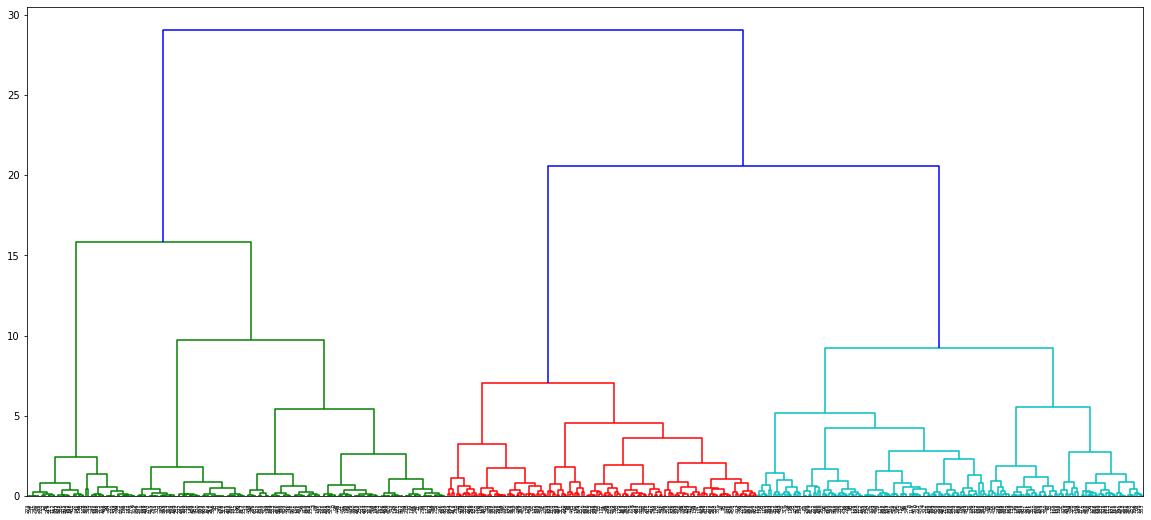

In [28]:
plt.figure(figsize=(20,9))
dingogram = sch.dendrogram(sch.linkage(X,method='ward'))

- From the above we can easily we can get the optimal value of k that is 5.
- Because,These are Longest lines compare to other.

In [29]:
from sklearn.cluster import AgglomerativeClustering

In [30]:
hc = AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='ward')

In [31]:
hc.fit(X)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=5)

In [32]:
y_predict=hc.fit_predict(X)
y_predict

array([1, 2, 0, 1, 0, 2, 3, 2, 0, 0, 0, 1, 3, 4, 1, 0, 0, 3, 4, 1, 4, 1,
       1, 3, 4, 1, 2, 3, 0, 0, 1, 2, 0, 3, 1, 0, 0, 0, 3, 2, 1, 2, 0, 2,
       2, 2, 2, 2, 0, 2, 2, 0, 1, 2, 0, 2, 0, 0, 3, 0, 0, 2, 2, 0, 0, 0,
       2, 2, 0, 0, 0, 3, 0, 0, 1, 0, 1, 1, 2, 0, 2, 1, 3, 2, 3, 1, 2, 1,
       1, 2, 4, 2, 1, 4, 1, 0, 0, 2, 1, 3, 4, 4, 0, 1, 4, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 3, 2, 0, 0, 0, 1, 2, 4, 0, 3, 0, 4, 2, 1, 2,
       0, 3, 2, 0, 2, 0, 0, 0, 2, 4, 2, 4, 2, 0, 2, 0, 0, 3, 1, 1, 4, 0,
       1, 3, 1, 1, 2, 2, 0, 1, 0, 1, 0, 2, 2, 2, 3, 0, 2, 2, 0, 0, 1, 0,
       1, 2, 0, 0, 0, 3, 2, 1, 3, 1, 2, 1, 4, 2, 0, 0, 1, 0, 2, 0, 3, 2,
       3, 0, 0, 2, 1, 0, 0, 4, 2, 2, 1, 2, 2, 4, 1, 0, 0, 2, 2, 4, 0, 3,
       0, 1, 4, 3, 2, 2, 3, 0, 0, 0, 1, 1, 4, 2, 0, 0, 1, 0, 1, 2, 1, 2,
       0, 0, 1, 2, 0, 4, 2, 2, 0, 1, 4, 0, 4, 3, 4, 2, 0, 2, 0, 0, 0, 2,
       0, 2, 1, 3, 1, 2, 4, 0, 2, 3, 0, 1, 3, 4, 2, 1, 3, 1, 0, 0, 2, 0,
       2, 0, 2, 1, 2, 2, 3, 2, 1, 0, 0, 4, 2, 1, 4,

In [33]:
hc.n_connected_components_

1

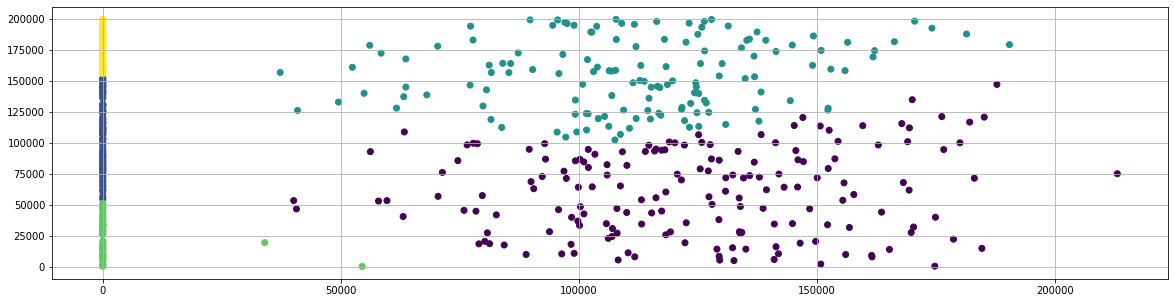

In [34]:
plt.figure(figsize=(20,5))
plt.scatter(data['Balance'],data['EstimatedSalary'],c=y_predict,cmap='viridis')
plt.grid()
plt.show()

In [35]:
from sklearn.metrics import silhouette_score

In [36]:
score = silhouette_score(X,y_predict)
score

0.4397512237357112

**Since,It is positive that mean the clustring has quite good.**